In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

D:\installings\New folder (2)\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.8' currently installed).
  warnings.warn(msg, UserWarning)
Using TensorFlow backend.


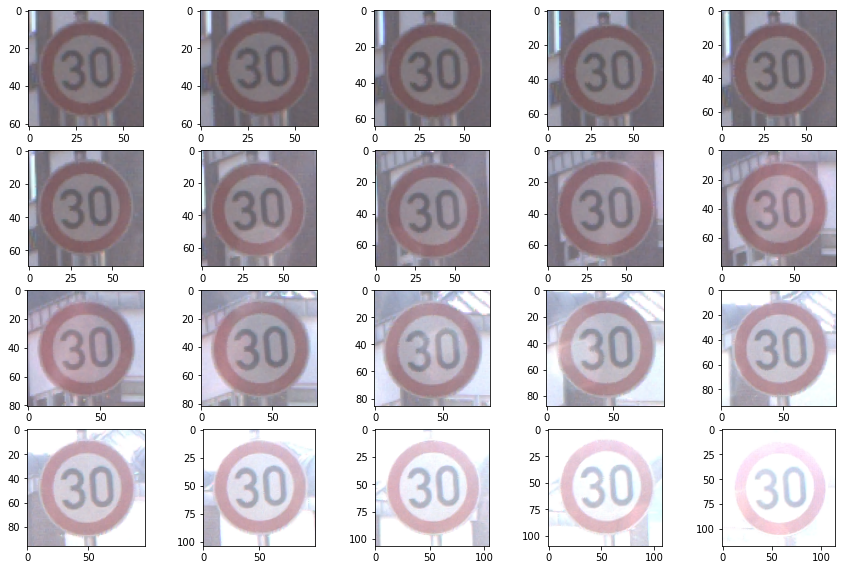

In [15]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
# define location of dataset
folder = 'E:/BHANUPRAKASH/sem9/Image Processing/archive/'
sub1_folder = 'Train/'
sub2_folder = '1/'

train_with_1 = os.path.join(folder + sub1_folder + sub2_folder)

plt.figure(figsize=(15,15))
# plot first few images
for i in range(10,30):
    # define subplot
    plt.subplot(6,5,i+1)   # i+1 because initially i = 0 , so subplot gives an error at i=0 (so change that i=1) 
    # define filename
    filename = train_with_1 + '00001_00000_000'+ str(i) + '.png'
     # load image pixels
    image = imread(filename)
    # plot raw pixel data
    plt.imshow(image)
# show the figure
plt.show()

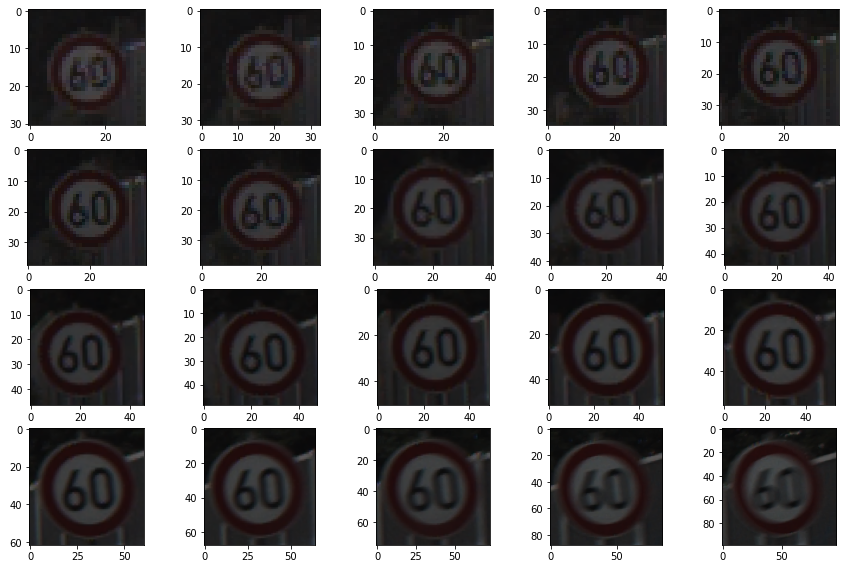

In [16]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
# define location of dataset
folder = 'E:/BHANUPRAKASH/sem9/Image Processing/archive/'
sub1_folder = 'Train/'
sub2_folder = '3/'

train_with_3 = os.path.join(folder + sub1_folder + sub2_folder)

plt.figure(figsize=(15,15))
# plot first few images
for i in range(10,30):
    # define subplot
    plt.subplot(6,5,i+1)   # i+1 because initially i = 0 , so subplot gives an error at i=0 (so change that i=1) 
    # define filename
    filename = train_with_3 + '00003_00000_000'+ str(i) + '.png'
     # load image pixels
    image = imread(filename)
    # plot raw pixel data
    plt.imshow(image)
# show the figure
plt.show()

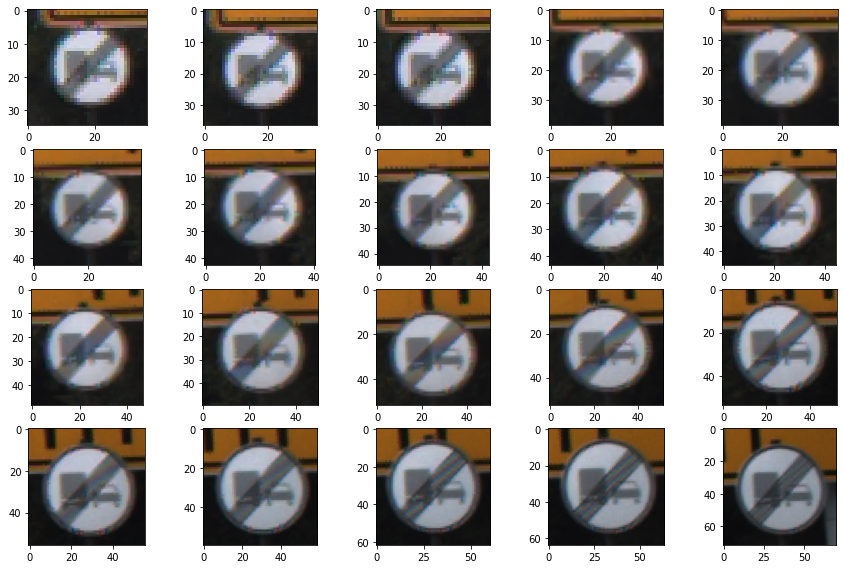

In [17]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
# define location of dataset
folder = 'E:/BHANUPRAKASH/sem9/Image Processing/archive/'
sub1_folder = 'Train/'
sub2_folder = '42/'

train_with_42 = os.path.join(folder + sub1_folder + sub2_folder)

plt.figure(figsize=(15,15))
# plot first few images
for i in range(10,30):
    # define subplot
    plt.subplot(6,5,i+1)   # i+1 because initially i = 0 , so subplot gives an error at i=0 (so change that i=1) 
    # define filename
    filename = train_with_42 + '00042_00000_000'+ str(i) + '.png'
     # load image pixels
    image = imread(filename)
    # plot raw pixel data
    plt.imshow(image)
# show the figure
plt.show()

In [18]:
train_image = len(os.listdir('E:/BHANUPRAKASH/sem9/Image Processing/archive/Train'))
print("Train Dataset: {}".format(train_image))

Train Dataset: 43


In [23]:
for i in range(43):
    train_image = len(os.listdir('E:/BHANUPRAKASH/sem9/Image Processing/archive/Train/'+str(i)))
    print(f"Train Dataset{i}: {train_image}")

Train Dataset0: 210
Train Dataset1: 2220
Train Dataset2: 2250
Train Dataset3: 1410
Train Dataset4: 1980
Train Dataset5: 1860
Train Dataset6: 420
Train Dataset7: 1440
Train Dataset8: 1410
Train Dataset9: 1470
Train Dataset10: 2010
Train Dataset11: 1320
Train Dataset12: 2100
Train Dataset13: 2160
Train Dataset14: 780
Train Dataset15: 630
Train Dataset16: 420
Train Dataset17: 1110
Train Dataset18: 1200
Train Dataset19: 210
Train Dataset20: 360
Train Dataset21: 330
Train Dataset22: 390
Train Dataset23: 510
Train Dataset24: 270
Train Dataset25: 1500
Train Dataset26: 600
Train Dataset27: 240
Train Dataset28: 540
Train Dataset29: 270
Train Dataset30: 450
Train Dataset31: 780
Train Dataset32: 240
Train Dataset33: 689
Train Dataset34: 420
Train Dataset35: 1200
Train Dataset36: 390
Train Dataset37: 210
Train Dataset38: 2070
Train Dataset39: 300
Train Dataset40: 360
Train Dataset41: 240
Train Dataset42: 240


In [25]:
data = []
labels = []
classes = 43
cur_path = 'E:\\BHANUPRAKASH\\sem9\\Image Processing\\archive'


In [26]:
#Retrieving the images and their labels 
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

In [27]:
#Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)

In [28]:
data.shape

(39209, 30, 30, 3)

In [29]:
labels.shape

(39209,)

In [30]:
#Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [31]:
#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [32]:
print( y_train.shape, y_test.shape)


(31367, 43) (7842, 43)


In [33]:
#Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

In [34]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        2432      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 32)        25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 9, 9, 64)          18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 64)         

In [35]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [36]:
epochs = 15
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))
model.save("my_model.h5")


Train on 31367 samples, validate on 7842 samples
Epoch 1/15
31367/31367 [==============================] - 57s 2ms/step - loss: 1.7965 - accuracy: 0.5274 - val_loss: 0.4374 - val_accuracy: 0.8792
Epoch 2/15
31367/31367 [==============================] - 51s 2ms/step - loss: 0.5492 - accuracy: 0.8400 - val_loss: 0.1715 - val_accuracy: 0.9480
Epoch 3/15
31367/31367 [==============================] - 53s 2ms/step - loss: 0.3678 - accuracy: 0.8933 - val_loss: 0.1420 - val_accuracy: 0.9619
Epoch 4/15
31367/31367 [==============================] - 54s 2ms/step - loss: 0.3193 - accuracy: 0.9094 - val_loss: 0.1036 - val_accuracy: 0.9708
Epoch 5/15
31367/31367 [==============================] - 56s 2ms/step - loss: 0.2945 - accuracy: 0.9185 - val_loss: 0.1153 - val_accuracy: 0.9680s - loss: 0.2946 - accuracy: 0.
Epoch 6/15
31367/31367 [==============================] - 61s 2ms/step - loss: 0.2756 - accuracy: 0.9243 - val_loss: 0.0906 - val_accuracy: 0.9732
Epoch 7/15
31367/31367 [==============

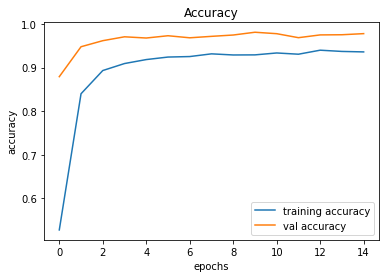

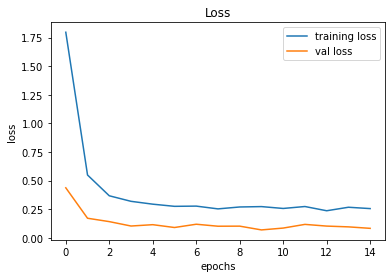

In [37]:
#plotting graphs for accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [39]:
#testing accuracy on test dataset
from sklearn.metrics import accuracy_score

y_test = pd.read_csv('E:/BHANUPRAKASH/sem9/Image Processing/archive/Test.csv')

labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data=[]

for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))

X_test=np.array(data)

pred = model.predict_classes(X_test)

#Accuracy with the test data
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, pred))


0.9543151227236738
